In [1]:
import shutil
file_name = "./Eyeball_movement_Dataset.zip"
output_dir = "./datasets/eye_image_seg_xl"
format = "zip"
shutil.unpack_archive(file_name, output_dir, format)

In [70]:
import os
import shutil

def find_png_files(source_folder):
    png_files = []
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                png_files.append(os.path.join(root, file))
    return png_files

def sort_png_files(source_folder, destination_folder):
    # 소스 폴더 내의 모든 PNG 파일을 찾음
    png_files = find_png_files(source_folder)

    # 가져온 파일들을 정렬하여 대상 폴더로 복사 또는 이동
    for png_file in sorted(png_files):
        filename = os.path.basename(png_file)
        shutil.copy(png_file, os.path.join(destination_folder, filename))
        # shutil.move(png_file, os.path.join(destination_folder, filename))  # 파일을 이동하려면 이 줄로 변경

# 소스 폴더와 대상 폴더 경로 설정
source_folder = './datasets/eye_image_seg_xl/image_data/311'
destination_folder = './datasets/eye_image_seg_xl/images_data'

# 정렬 함수 호출
sort_png_files(source_folder, destination_folder)

In [9]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [68]:
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import os

def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    images = []

    label_dict = {
        'right_center': 1,
        'left_center': 2,
        'right_pupil': 3,
        'left_pupil': 4,
        'right_iris': 5,
        'left_iris': 6,
        'right_eyelid': 7,
        'left_eyelid': 8
    }

    for image in root.findall('image'):
        image_data = {
            'name': image.get('name'),
            'width': int(image.get('width')),
            'height': int(image.get('height')),
            'polygons': []
        }

        for polygon in image.findall('polygon'):
            label = polygon.get('label')
            points = polygon.get('points')
            points = np.array([tuple(map(float, p.split(','))) for p in points.split(';')])
            image_data['polygons'].append({'label': label_dict[label], 'points': points})

        images.append(image_data)

    return images

def mask_image(image_path, polygons):
    img = cv2.imread(image_path)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)  # Create a single channel mask

    for polygon in polygons:
        points = polygon['points'].astype(int)
        cv2.fillPoly(mask, [points], polygon['label'])

    return mask

xml_files = glob.glob(os.path.join('./datasets/eye_image_seg_xl/labeled_data/313', '*.xml'))
# print(xml_files)
# xml_file_path = './datasets/eye_image_seg_xl/labeled_data/313/NIA_EYE_G2_313_30_RGB.xml'
# images_data = parse_xml(xml_file_path)

base_image_path = './datasets/eye_image_seg_xl/image_data/313'
base_save_path = './datasets/eye_image_seg_xl/labeled_data/masked_images'

os.makedirs(base_save_path, exist_ok=True)

for xml_file in xml_files:
    images_data = parse_xml(xml_file)
    for image_data in images_data:
        image_path = os.path.join(base_image_path, image_data['name'])
        polygons = image_data['polygons']
        masked_img = mask_image(image_path, polygons)
        save_path = os.path.join(base_save_path, f'masked_image_{image_data["name"]}')
        cv2.imwrite(save_path, masked_img)

In [78]:
import os
import random

def get_random_image_path(folder_path):
    files_and_dirs = os.listdir(folder_path)
    
    image_files = [file for file in files_and_dirs if os.path.isfile(os.path.join(folder_path, file)) and file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if image_files:
        return os.path.join(folder_path, random.choice(image_files))
    else:
        return None

folder_path = './datasets/eye_image_seg_xl/labeled_data/masked_images'
random_image_path = get_random_image_path(folder_path)

if random_image_path:
    print("Random Image Path:", random_image_path)
else:
    print("No images found in the folder.")

Random Image Path: ./datasets/eye_image_seg_xl/labeled_data/masked_images\masked_image_NIA_EYE_G2_311_VR_IR_F_LEYE_5301.png


Image 1 array shape: (720, 1280, 3)
Image 1 array:
[[[35 36 40]
  [34 35 39]
  [32 33 37]
  ...
  [25 28 33]
  [25 29 32]
  [26 30 33]]

 [[32 33 37]
  [31 32 36]
  [29 30 34]
  ...
  [26 29 34]
  [26 30 33]
  [25 29 32]]

 [[32 33 37]
  [30 31 35]
  [28 29 33]
  ...
  [26 30 33]
  [25 29 32]
  [24 28 31]]

 ...

 [[26 27 31]
  [25 26 30]
  [25 26 30]
  ...
  [21 22 24]
  [20 21 23]
  [21 22 24]]

 [[24 25 27]
  [25 26 28]
  [25 26 28]
  ...
  [24 25 29]
  [23 24 28]
  [23 24 28]]

 [[23 24 26]
  [23 24 26]
  [24 25 27]
  ...
  [25 26 30]
  [21 22 26]
  [22 23 27]]]

Image 2 array shape: (720, 1280)
Image 2 array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Image 3 array shape: (1024, 1024)
Image 3 array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Image 4 array shape: (1024, 1024)
Image 4 array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


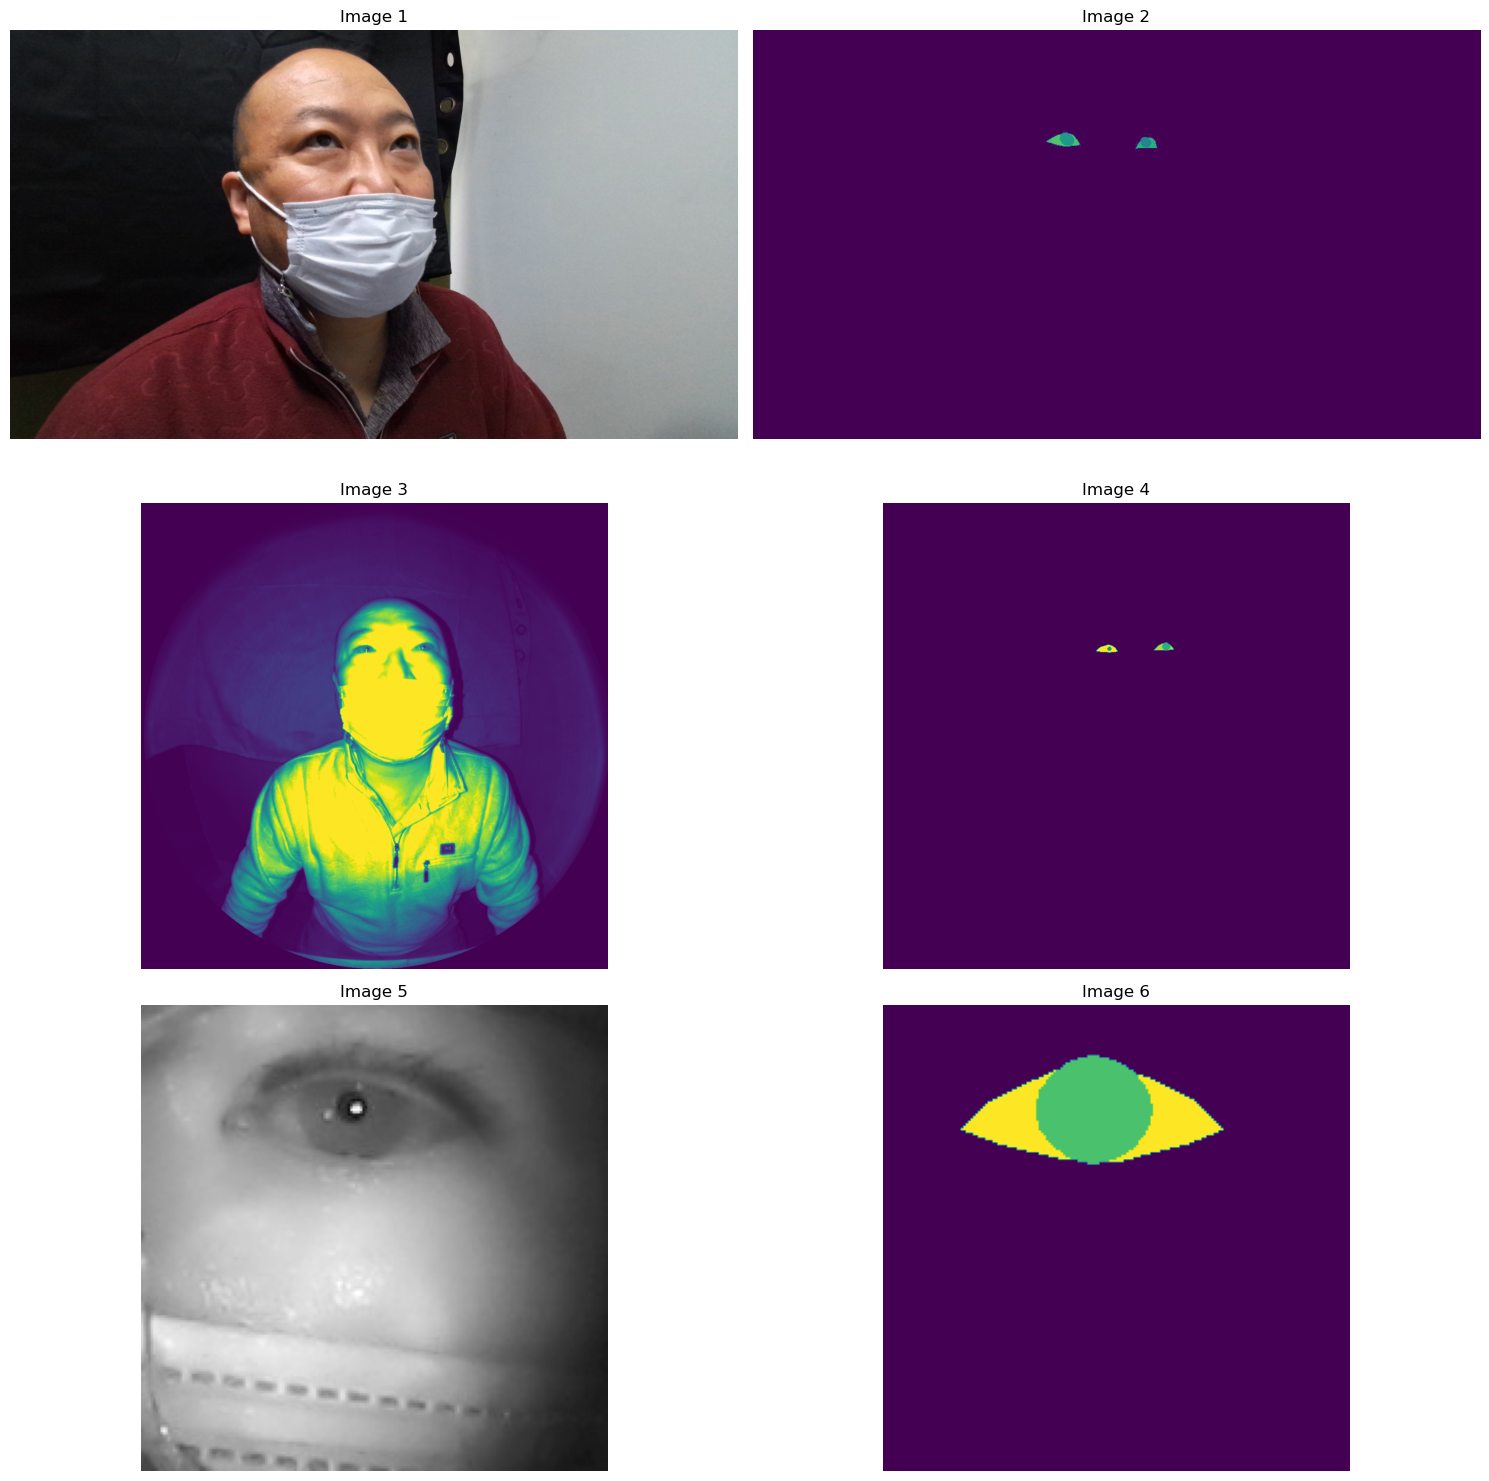

In [85]:
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 리스트
image_paths = [
    './datasets/eye_image_seg_xl/image_data/313/NIA_EYE_G2_313_30_RGB_R_0876.jpg',
    './datasets/eye_image_seg_xl/labeled_data/313/masked_images/masked_image_NIA_EYE_G2_313_30_RGB_R_0876.jpg',
    './datasets/eye_image_seg_xl/image_data/313/NIA_EYE_G2_313_30_IR_F_0576_mod.png',
    './datasets/eye_image_seg_xl/labeled_data/313/masked_images\masked_image_NIA_EYE_G2_313_30_IR_F_0576_mod.png',
    './datasets/eye_image_seg_xl/image_data/311/NIA_EYE_G2_311_VR_IR_F_LEYE_5301.png',
    './datasets/eye_image_seg_xl/labeled_data/masked_images\masked_image_NIA_EYE_G2_311_VR_IR_F_LEYE_5301.png',
]

# 이미지를 나란히 출력할 열의 수
num_cols = 2

# 이미지 수
num_images = len(image_paths)

# 행 수 계산
num_rows = (num_images + num_cols - 1) // num_cols

# matplotlib subplot 설정
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

image_arrays = []

# 각 이미지를 subplot에 그림
for i, image_path in enumerate(image_paths):
    row = i // num_cols
    col = i % num_cols
    image = Image.open(image_path)
    image = Image.open(image_path)
    image_array = np.array(image)
    image_arrays.append(image_array)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Image {i+1}')
    
for i, image_array in enumerate(image_arrays):
    print(f"Image {i+1} array shape:", image_array.shape)
    print("Image", i+1, "array:")
    print(image_array[:50, :50])  # 처음 5행과 5열만 출력
    print()

# 빈 subplot 삭제
for i in range(num_images, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [17]:
import os

def delete_png_png_files(folder_path):
    # 폴더 내 파일 목록을 가져옴
    files = os.listdir(folder_path)

    # 파일 목록을 순회하며 .png.png 파일을 삭제
    for file in files:
        if file.endswith('png'):
            os.remove(os.path.join(folder_path, file))

# 삭제할 폴더 경로 지정
folder_path = './datasets/eye_image_seg_xl/labeled_data/313'

# 함수 호출하여 .png.png 파일 삭제
delete_png_png_files(folder_path)